# Wrist Data Analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
import matplotlib.patches as mpatches

In [62]:
def difference(dataset, interval=1):
	diff = []
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

In [78]:
def angles_plot(df,angle_name,window=1000):
    
    angle_thresh = 0.01
    
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    labels = [0]*window
    angles = np.array(df[angle_name+'_Angle'])
    
    for i in range(df.shape[0]-window):
        j = i + window
        loc_angles = angles[j-window:j]
        diff = difference(loc_angles).mean()
        if(abs(diff)<angle_thresh):
            labels.append(0)
        elif(diff>0):
            labels.append(1)
        else:
            labels.append(2)
            
    i = 0
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            face = '1'
        if lb==1:
            face='r'
        if lb==2:
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.5)
        i = i+1
   
    y = np.linspace(0,df.shape[0],df.shape[0])
    plt.plot(y,angles, linewidth=2, markersize=12)
    plt.title(angle_name+' Classifications')
    
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('Angle (deg)')    
    plt.show()

In [73]:
def angles_plot_DTM(df,window=1000):
    
    angle_thresh = 0.008
    
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    labels = [0]*window
    angles_flexion = np.array(df['Flexion_Angle'])
    angles_radial = np.array(df['Radial_Angle'])
    
    for i in range(df.shape[0]-window):
        j = i + window
        loc_flexion = angles_flexion[j-window:j]
        loc_radial = angles_radial[j-window:j]
        
        diff_flexion = difference(loc_flexion).mean()
        diff_radial = difference(loc_radial).mean()
        
        if(abs(diff_flexion)<angle_thresh and abs(diff_radial)<angle_thresh):
            labels.append(0)
        elif(diff_flexion>0 and diff_radial>0):
            labels.append(1)
        else:
            labels.append(2)
            
    i = 0
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            face = '1'
        if lb==1:
            face='r'
        if lb==2:
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.5)
        i = i+1
   
    y = np.linspace(0,df.shape[0],df.shape[0])
    plt.plot(y,angles_flexion, linewidth=2, markersize=12,label='Extension/Flexion Angle')
    plt.plot(y,angles_radial, linewidth=2, markersize=12,label='Ulnar/Radial Angle')
    plt.title('DTM Classifications')
    
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('Angle (deg)')    
    plt.show()

In [65]:
path = 'Subjects/Fazil/day_04_24_21/'

file = path + 'computed_Hammer.csv'
Hammer = pd.read_csv(file,index_col=0)
file = path + 'computed_Cup.csv'
Cup = pd.read_csv(file,index_col=0)
file = path + 'computed_Bulb.csv'
Bulb = pd.read_csv(file,index_col=0)
file = path + 'computed_Screw.csv'
Screw = pd.read_csv(file,index_col=0)

<AxesSubplot:xlabel='t [2000hz]', ylabel='Angle (deg)'>

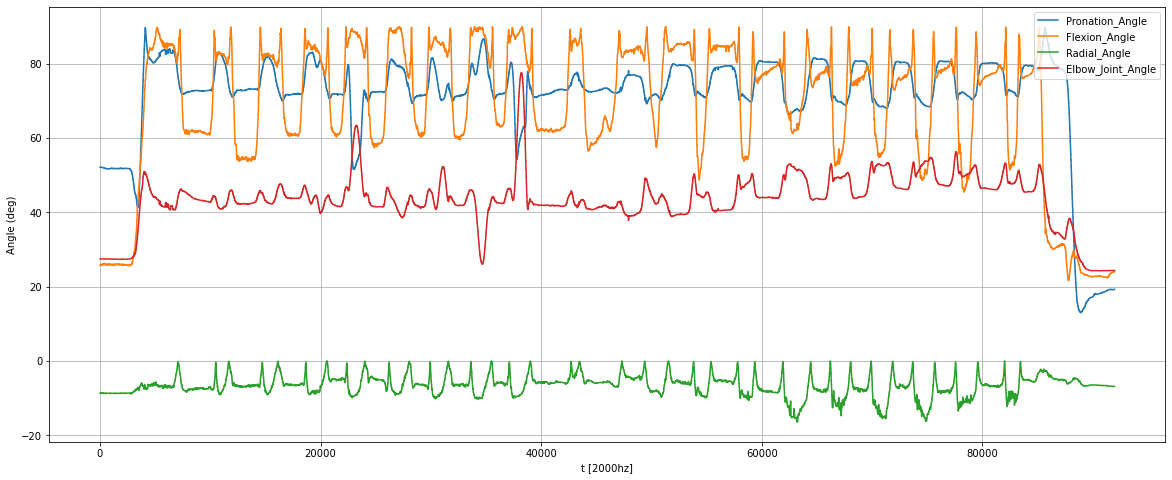

In [82]:
df = Bulb[['Pronation_Angle','Flexion_Angle','Radial_Angle','Elbow_Joint_Angle']]
df.plot(figsize=(20,8),legend=True,xlabel='t [2000hz]',ylabel='Angle (deg)',grid=True)

In [67]:
df = df[15000:35000]

- Clear - No Motion
- Red - Positive Direction
- Blue - Negative Direction

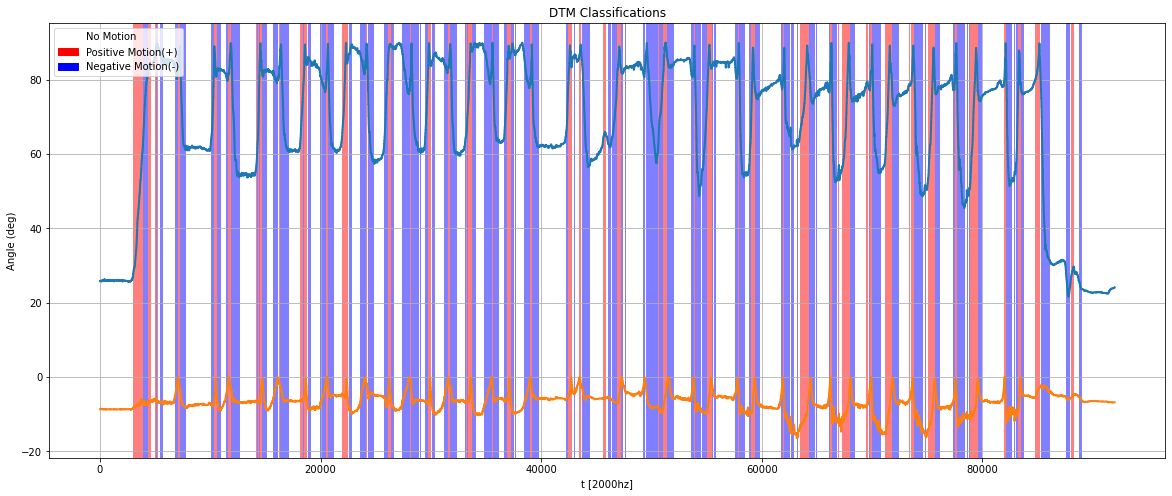

elp- 174.3547022342682


In [83]:
st = time()
fig = angles_plot_DTM(df,300)
print('elp-',(time()-st))

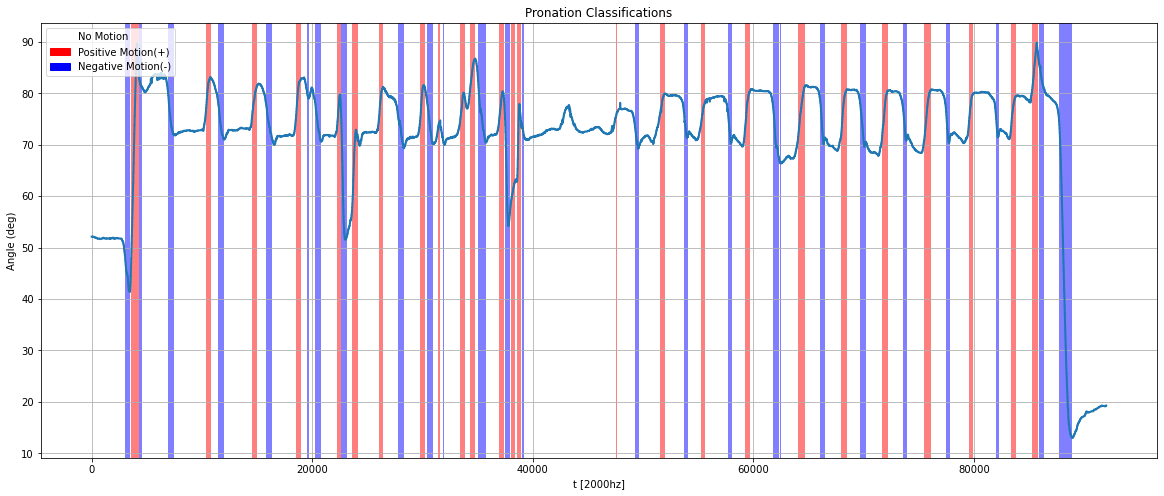

elp- 161.99374294281006


In [85]:
st = time()
fig = angles_plot(df,'Pronation',300)
print('elp-',(time()-st))

In [51]:
Hammer[['Pronation_Angle','Flexion_Angle','Radial_Angle','Elbow_Joint_Angle']].describe()

,Pronation_Angle,Flexion_Angle,Radial_Angle,Elbow_Joint_Angle
count,54000.000000,54000.000000,54000.000000,54000.000000
mean,74.726219,53.608026,-2.860676,34.656572
std,15.863335,16.448584,3.189437,5.335869
min,15.028426,23.145036,-10.840965,23.723008
25%,78.627578,40.278069,-5.900567,30.956145
50%,80.697719,55.321790,-0.911475,36.129522
75%,81.772450,70.280929,-0.310285,39.210870
max,89.993319,77.486824,-0.000027,44.027489


In [ ]:
def count_labesl(array):
    ln = len(array)
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    for x in array:
        if(x==0):
            sum_0 = sum_0 + 1
        if(x==1):
            sum_1 = sum_0 + 1
        if(x==2):
            sum_2 = sum_0 + 1
    print('Label 0 =',sum_0)
    print('Label 1 =',sum_1)
    print('Label 2 =',sum_2)

In [ ]:
print('Pronation_Label Count')
count_labesl(Hammer['Pronation_Label'])
print('Flexion_Label Count')
count_labesl(Hammer['Flexion_Label'])
print('Radial_Label Count')
count_labesl(Hammer['Radial_Label'])
print('DTM_Label Count')
count_labesl(Hammer['DTM_Label'])

In [ ]:
def otha():
    x = np.linspace(0,1,10)
    fig= plt.figure()
    
    plt.xlim(0, 5)
    plt.ylim(0, 5)

    for i in range(0, 5):
        plt.axvspan(i, i+.2, facecolor=str(0.5*1), alpha=0.5)

    plt.show()
    return plt.show

In [ ]:
fig = otha()